<a href="https://colab.research.google.com/github/VaishnaviOlekar8/Qunatbit/blob/main/Manufacturing_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
Defected: 51.94%


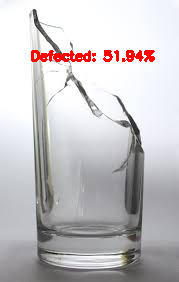

Accuracy: 0.8
Confusion Matrix:
 [[2 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

    Defected       0.67      1.00      0.80         2
Non Defected       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [6]:
import os
from PIL import Image, ImageOps
try:
    from PIL import ImageResampling
except ImportError:
    ImageResampling = Image
import tensorflow.keras
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Dataset/glass.h5')
classes = ['Defected', 'Non Defected']

def evaluate_model(true_labels, predicted_labels):
    print("Accuracy:", accuracy_score(true_labels, predicted_labels))
    print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_labels))
    print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=classes))

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

image = Image.open('/content/drive/MyDrive/Dataset/defected.jpeg')

size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.BICUBIC)

image_array = np.asarray(image)
image.show()
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

data[0] = normalized_image_array
(defected, nonDefected) = model.predict(data)[0]

label = "Defected" if defected > nonDefected else "Non Defected"
color = (0, 255, 0) if label == "Non Defected" else (0, 0, 255)

label = "{}: {:.2f}%".format(label, max(defected, nonDefected) * 100)
print(label)

image_cv = cv2.imread(img_path)
cv2.putText(image_cv, label, (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
cv2_imshow(image_cv)
cv2.imwrite("/content/detected1.jpg", image_cv)

dummy_true_labels = [1, 0, 1, 1, 0]
dummy_predicted_labels = [1, 0, 1, 0, 0]
evaluate_model(dummy_true_labels, dummy_predicted_labels)
